<a href="https://colab.research.google.com/github/Aagam49/-generative-adversarial-network/blob/main/GAN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from keras.datasets import cifar100
from matplotlib import pyplot
import numpy as np
from IPython import display

(x_train,y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Load fine label names
fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'cactus',
    'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee',
    'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
    'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip',
    'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

unique_labels = np.unique(y_train)

# Print unique labels with names
print("Available CIFAR-100 labels in training set:")
print(unique_labels)

print(f"Tree samples in train: {x_train.shape[0]}")
print(f"Tree samples in test: {x_test.shape[0]}")

#for label in unique_labels:
#    print(f"{label}: {label_names[label]}")

Available CIFAR-100 labels in training set:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Tree samples in train: 50000
Tree samples in test: 10000


In [ ]:
# Get label index for "tree" categories (multiple kinds of trees)
tree_labels = ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree']
# tree_label_indices = [fine_labels.index(name) for name in tree_labels]
tree_label_indices = [47, 52, 56, 59, 96]
print(tree_label_indices)


x_train = x_train[np.isin(y_train.flatten(), tree_label_indices)]
y_train = y_train[np.isin(y_train.flatten(), tree_label_indices)]

x_test = x_test[np.isin(y_test.flatten(), tree_label_indices)]
y_test = y_test[np.isin(y_test.flatten(), tree_label_indices)]


print(f"Tree samples in train: {x_train.shape[0]}")
print(f"Tree samples in test: {x_test.shape[0]}")

[47, 52, 56, 59, 96]
Tree samples in train: 2500
Tree samples in test: 500


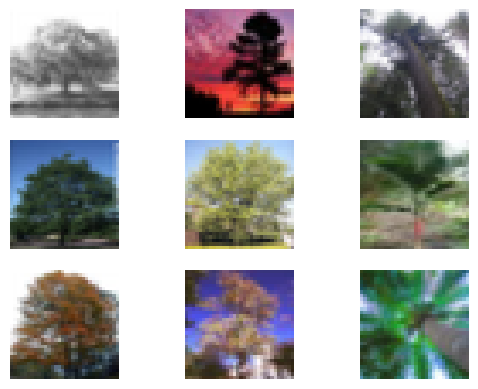

In [ ]:
# display first 9 training images
for i in range(9):
  pyplot.subplot(3,3,i+1)
  pyplot.axis('off')
  pyplot.imshow(x_train[i])

pyplot.show()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2500, 32, 32, 3)
(2500, 1)
(500, 32, 32, 3)
(500, 1)


In [ ]:
# Normalize image pixel values from [0, 255] to [-1, 1]
x_train = (x_train.astype("float32") - 127.5) / 127.5
x_test = (x_test.astype("float32") - 127.5) / 127.5


print("x_train_airplane min:", x_train.min())
print("x_train_airplane max:", x_train.max())

x_train_airplane min: -1.0
x_train_airplane max: 1.0


In [ ]:
BUFFER_SIZE = 2500
BATCH_SIZE = 256

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def build_generator(latent_dim=100):
    model = tf.keras.Sequential(name="generator")


    model.add(layers.Dense(8 * 8 * 256, use_bias=False, input_shape=(latent_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((8, 8, 256)))  # Shape: (8, 8, 256)

    # Upsample to (16, 16, 128)
    model.add(layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Upsample to (32, 32, 64)
    model.add(layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Final layer: Output shape (32, 32, 3) with tanh activation
    model.add(layers.Conv2DTranspose(3, kernel_size=3, strides=1, padding='same', activation='tanh'))

    return model


generator = build_generator()
generator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16384)          │     1,638,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16384)          │        65,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 16, 16, 128)    │       524,288 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 32, 32, 64)     │       131,072 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 32, 32, 3)      │         1,731 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,361,795 (9.01 MB)

 Trainable params: 2,328,643 (8.88 MB)

 Non-trainable params: 33,152 (129.50 KB)

In [ ]:
import numpy as np

latent_dim = 100
random_noise = np.random.normal(0, 1, size=(1, latent_dim))
generated_image = generator(random_noise)

In [ ]:
random_noise = np.random.normal(0, 1, size=(1, 100))
random_noise

array([[ 1.26151785, -0.0676429 ,  1.23815723,  1.57069184, -0.7266413 ,
        -0.45744777,  0.47119974, -0.44180856, -0.5097447 , -0.27260521,
        -0.41229569,  1.12910869, -0.70681837, -1.08593651,  0.85341977,
         0.22135608, -2.40818928,  0.81905975, -2.1938479 , -0.72858893,
        -1.4879748 ,  0.39374223, -0.15886657,  0.28345872,  0.68686351,
        -1.77699192, -1.35385928,  0.17566706,  0.56178158,  1.24163977,
         1.24517881,  0.36904784, -0.18680112, -1.20459511, -1.55682993,
        -0.78110453, -0.24634864,  0.54643326, -0.58511731,  0.35485462,
         0.67932303, -1.4063081 , -0.22688639,  0.03269033,  0.22586238,
         0.59760653,  0.98134691,  0.98064071, -0.12383119, -0.90802464,
         0.24785502, -0.91340757, -0.3776432 ,  1.70045907, -2.20772919,
         0.74932496, -0.36903113,  0.27603231, -1.58068673, -1.85522085,
         0.54600037, -0.52277722, -1.00777836, -1.05036022,  0.26467556,
        -0.44398308,  1.72231166,  0.70559916, -0.2

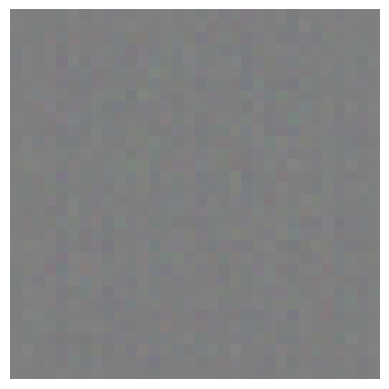

In [ ]:
import matplotlib.pyplot as plt

def show_generated_image(img_tensor):
    img = img_tensor[0].numpy()
    img = (img + 1.0) * 127.5
    img = img.astype("uint8")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

show_generated_image(generated_image)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def build_discriminator(input_shape=(32, 32, 3)):
    model = tf.keras.Sequential(name="discriminator")

    #  32x32x3  Downsample
    model.add(layers.Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=input_shape))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # 16x16x64  Downsample
    model.add(layers.Conv2D(128, kernel_size=4, strides=2, padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # 8x8x128  Flatten and classify
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))

    return model


discriminator = build_discriminator()
discriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,529 (556.75 KB)

 Trainable params: 142,529 (556.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[0.4997206]], shape=(1, 1), dtype=float32)


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
EPOCHS = 2500
latent_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, latent_dim])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def generate_and_show_images(model, epoch, test_input):
    generated_images = model(test_input, training=False)

    # Rescale from [-1, 1] to [0, 255] for visualization
    # generated_images = 0.5 * generated_images + 0.5
    # generated_images = (generated_images + 1.0) * 127.5
    # print(generated_images)

    # Plot in a 4x4 grid
    fig, axes = plt.subplots(4, 4, figsize=(4, 4))
    count = 0
    for i in range(4):
        for j in range(4):
            axes[i, j].imshow((generated_images[count] + 1) / 2)
            axes[i, j].axis("off")
            count += 1

    plt.suptitle(f"Generated Images at Epoch {epoch}")
    plt.tight_layout()
    plt.show()

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, latent_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
import time

def train(dataset,epochs=2500):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    if epoch % 100 == 0:
        generate_and_show_images(generator, epoch + 1, seed)

    if epoch % 10 == 0:
        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  generate_and_show_images(generator,epochs, seed)

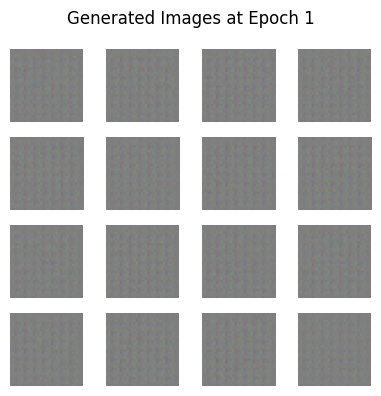

Time for epoch 1 is 5.484345436096191 sec
Time for epoch 11 is 0.7504076957702637 sec
Time for epoch 21 is 0.7509965896606445 sec
Time for epoch 31 is 0.7540407180786133 sec
Time for epoch 41 is 0.7574498653411865 sec
Time for epoch 51 is 0.7602205276489258 sec
Time for epoch 61 is 0.7625932693481445 sec
Time for epoch 71 is 0.7658076286315918 sec
Time for epoch 81 is 0.7697036266326904 sec
Time for epoch 91 is 0.7703714370727539 sec


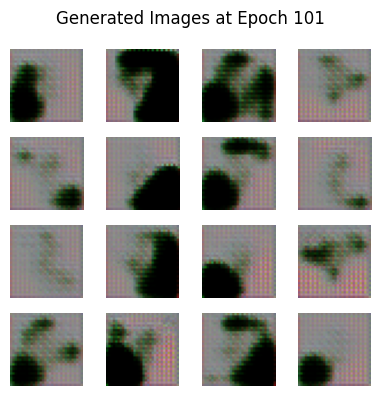

Time for epoch 101 is 1.3407642841339111 sec
Time for epoch 111 is 0.7778041362762451 sec
Time for epoch 121 is 0.7785325050354004 sec
Time for epoch 131 is 0.779538631439209 sec
Time for epoch 141 is 0.7815756797790527 sec
Time for epoch 151 is 0.7832422256469727 sec
Time for epoch 161 is 0.7867004871368408 sec
Time for epoch 171 is 0.7878713607788086 sec
Time for epoch 181 is 0.7878472805023193 sec
Time for epoch 191 is 0.7869553565979004 sec


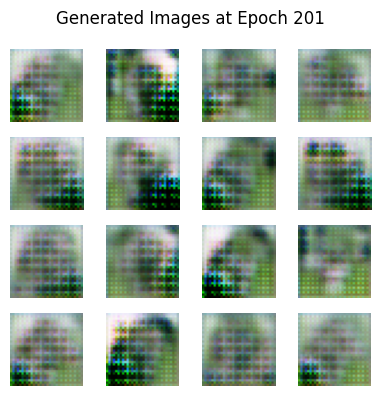

Time for epoch 201 is 1.1703238487243652 sec
Time for epoch 211 is 0.7921562194824219 sec
Time for epoch 221 is 0.7903661727905273 sec
Time for epoch 231 is 0.7929294109344482 sec
Time for epoch 241 is 0.7926986217498779 sec
Time for epoch 251 is 0.8020210266113281 sec
Time for epoch 261 is 0.8039922714233398 sec
Time for epoch 271 is 0.7910566329956055 sec
Time for epoch 281 is 0.7998578548431396 sec
Time for epoch 291 is 0.7951333522796631 sec


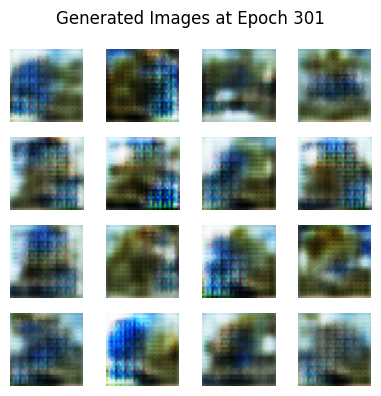

Time for epoch 301 is 1.0402047634124756 sec
Time for epoch 311 is 0.7959105968475342 sec
Time for epoch 321 is 0.8059263229370117 sec
Time for epoch 331 is 0.8090486526489258 sec
Time for epoch 341 is 0.8081505298614502 sec
Time for epoch 351 is 0.8023233413696289 sec
Time for epoch 361 is 0.8093657493591309 sec
Time for epoch 371 is 0.7962613105773926 sec
Time for epoch 381 is 0.8107578754425049 sec
Time for epoch 391 is 0.794337272644043 sec


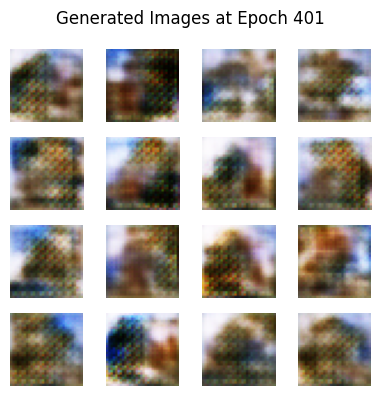

Time for epoch 401 is 1.0624730587005615 sec
Time for epoch 411 is 0.8084897994995117 sec
Time for epoch 421 is 0.8093822002410889 sec
Time for epoch 431 is 0.8094325065612793 sec
Time for epoch 441 is 1.2614457607269287 sec
Time for epoch 451 is 0.8101768493652344 sec
Time for epoch 461 is 0.81064772605896 sec
Time for epoch 471 is 0.8077096939086914 sec
Time for epoch 481 is 0.8111476898193359 sec
Time for epoch 491 is 0.8066542148590088 sec


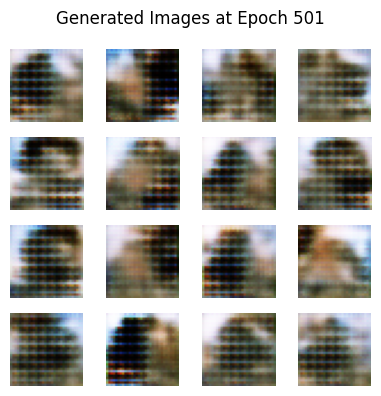

Time for epoch 501 is 1.0531206130981445 sec
Time for epoch 511 is 0.8091952800750732 sec
Time for epoch 521 is 0.8096635341644287 sec
Time for epoch 531 is 0.8101298809051514 sec
Time for epoch 541 is 0.8090856075286865 sec
Time for epoch 551 is 0.809131383895874 sec
Time for epoch 561 is 0.8109292984008789 sec
Time for epoch 571 is 0.8100018501281738 sec
Time for epoch 581 is 0.8106815814971924 sec
Time for epoch 591 is 0.8116765022277832 sec


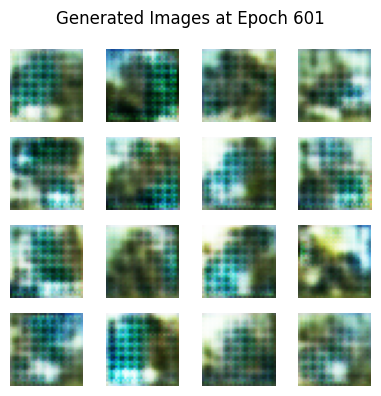

Time for epoch 601 is 1.1671106815338135 sec
Time for epoch 611 is 0.810004472732544 sec
Time for epoch 621 is 0.8098995685577393 sec
Time for epoch 631 is 0.8114874362945557 sec
Time for epoch 641 is 0.8114156723022461 sec
Time for epoch 651 is 0.8100340366363525 sec
Time for epoch 661 is 0.811206579208374 sec
Time for epoch 671 is 0.8103232383728027 sec
Time for epoch 681 is 0.8090341091156006 sec
Time for epoch 691 is 0.8081321716308594 sec


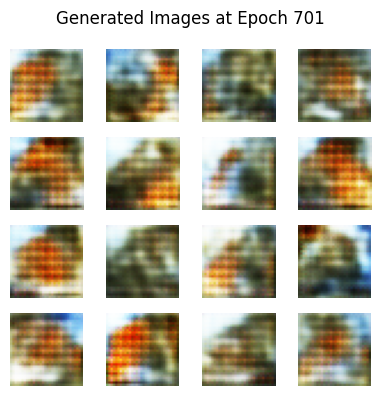

Time for epoch 701 is 1.057875394821167 sec
Time for epoch 711 is 0.8100883960723877 sec
Time for epoch 721 is 0.8116025924682617 sec
Time for epoch 731 is 0.8093256950378418 sec
Time for epoch 741 is 0.8105533123016357 sec
Time for epoch 751 is 0.8089497089385986 sec
Time for epoch 761 is 0.8105266094207764 sec
Time for epoch 771 is 0.8099179267883301 sec
Time for epoch 781 is 0.8063437938690186 sec
Time for epoch 791 is 0.8091540336608887 sec


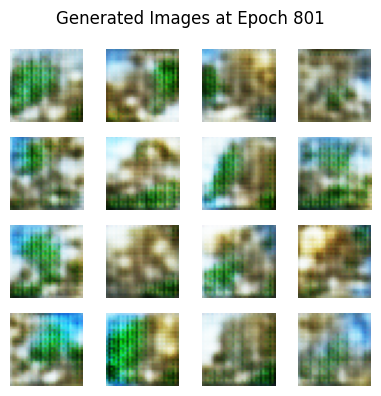

Time for epoch 801 is 1.3904316425323486 sec
Time for epoch 811 is 0.8106482028961182 sec
Time for epoch 821 is 0.8108444213867188 sec
Time for epoch 831 is 0.8100426197052002 sec
Time for epoch 841 is 0.8108031749725342 sec
Time for epoch 851 is 0.8111457824707031 sec
Time for epoch 861 is 0.8102359771728516 sec
Time for epoch 871 is 0.808133602142334 sec
Time for epoch 881 is 0.8096041679382324 sec
Time for epoch 891 is 0.8087222576141357 sec


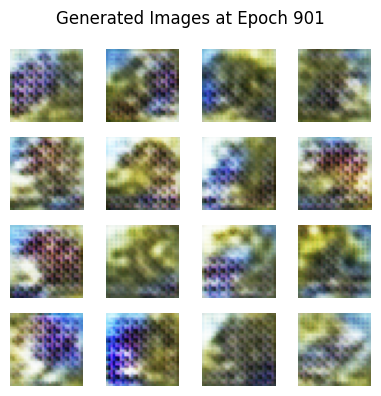

Time for epoch 901 is 1.0647873878479004 sec
Time for epoch 911 is 0.8114833831787109 sec
Time for epoch 921 is 0.811060905456543 sec
Time for epoch 931 is 0.8087253570556641 sec
Time for epoch 941 is 0.8114738464355469 sec
Time for epoch 951 is 0.8104264736175537 sec
Time for epoch 961 is 0.8104774951934814 sec
Time for epoch 971 is 0.8105509281158447 sec
Time for epoch 981 is 0.8089773654937744 sec
Time for epoch 991 is 0.8101024627685547 sec


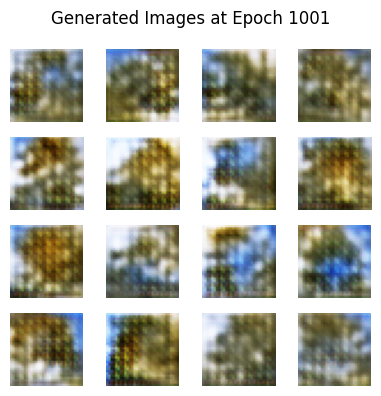

Time for epoch 1001 is 1.1774163246154785 sec
Time for epoch 1011 is 0.8101894855499268 sec
Time for epoch 1021 is 0.8096408843994141 sec
Time for epoch 1031 is 0.809490442276001 sec
Time for epoch 1041 is 0.81093430519104 sec
Time for epoch 1051 is 0.8082363605499268 sec
Time for epoch 1061 is 0.8094747066497803 sec
Time for epoch 1071 is 0.809999942779541 sec
Time for epoch 1081 is 0.811150074005127 sec
Time for epoch 1091 is 0.8080785274505615 sec


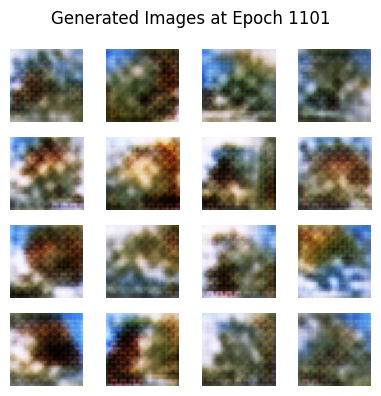

Time for epoch 1101 is 1.0520563125610352 sec
Time for epoch 1111 is 0.8104543685913086 sec
Time for epoch 1121 is 0.8051412105560303 sec
Time for epoch 1131 is 0.8096566200256348 sec
Time for epoch 1141 is 0.8098886013031006 sec
Time for epoch 1151 is 0.805976152420044 sec
Time for epoch 1161 is 0.8102459907531738 sec
Time for epoch 1171 is 0.8112225532531738 sec
Time for epoch 1181 is 0.8104307651519775 sec
Time for epoch 1191 is 0.8104186058044434 sec


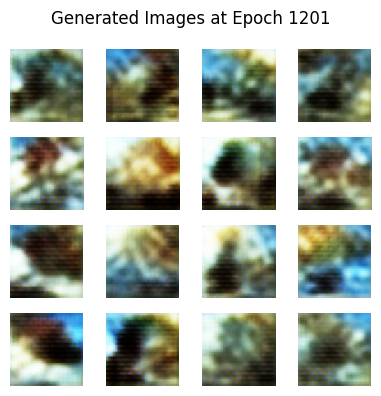

Time for epoch 1201 is 1.0604848861694336 sec
Time for epoch 1211 is 0.8093516826629639 sec
Time for epoch 1221 is 0.8088223934173584 sec
Time for epoch 1231 is 0.8125014305114746 sec
Time for epoch 1241 is 0.8116011619567871 sec
Time for epoch 1251 is 0.8114402294158936 sec
Time for epoch 1261 is 0.8095686435699463 sec
Time for epoch 1271 is 0.8104982376098633 sec
Time for epoch 1281 is 0.8086063861846924 sec
Time for epoch 1291 is 0.8127028942108154 sec


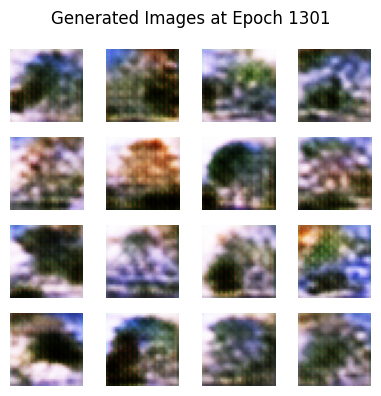

Time for epoch 1301 is 1.0770106315612793 sec
Time for epoch 1311 is 0.8126335144042969 sec
Time for epoch 1321 is 0.8098132610321045 sec
Time for epoch 1331 is 0.811497688293457 sec
Time for epoch 1341 is 0.8103137016296387 sec
Time for epoch 1351 is 0.8098413944244385 sec
Time for epoch 1361 is 0.8107829093933105 sec
Time for epoch 1371 is 0.811168909072876 sec
Time for epoch 1381 is 0.8120803833007812 sec
Time for epoch 1391 is 0.8107137680053711 sec


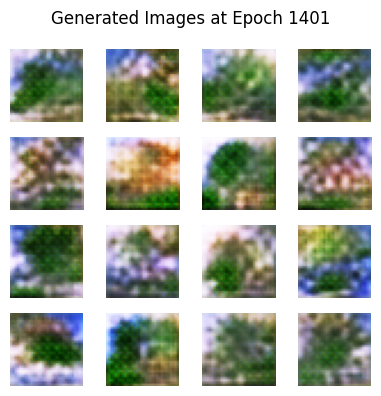

Time for epoch 1401 is 1.617072343826294 sec
Time for epoch 1411 is 0.8102326393127441 sec
Time for epoch 1421 is 0.8100638389587402 sec
Time for epoch 1431 is 0.8107638359069824 sec
Time for epoch 1441 is 0.8095672130584717 sec
Time for epoch 1451 is 0.8093733787536621 sec
Time for epoch 1461 is 0.8072915077209473 sec
Time for epoch 1471 is 0.8091397285461426 sec
Time for epoch 1481 is 0.8095862865447998 sec
Time for epoch 1491 is 0.8088054656982422 sec


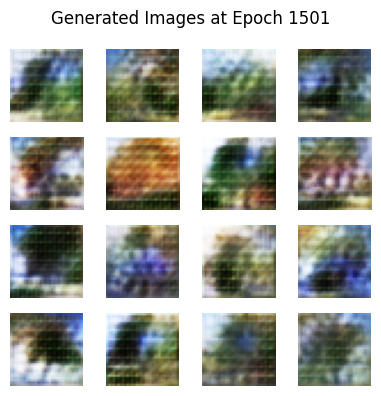

Time for epoch 1501 is 1.1996817588806152 sec
Time for epoch 1511 is 0.8088333606719971 sec
Time for epoch 1521 is 0.8108525276184082 sec
Time for epoch 1531 is 0.8101415634155273 sec
Time for epoch 1541 is 0.8100395202636719 sec
Time for epoch 1551 is 0.808506965637207 sec
Time for epoch 1561 is 0.8098838329315186 sec
Time for epoch 1571 is 0.8106381893157959 sec
Time for epoch 1581 is 0.8122773170471191 sec
Time for epoch 1591 is 0.811016321182251 sec


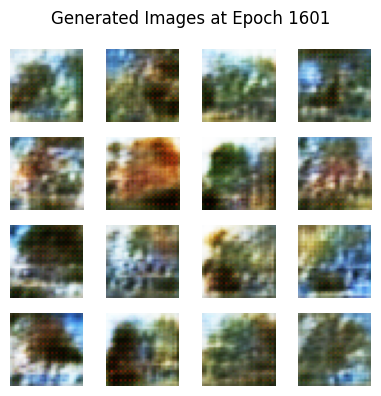

Time for epoch 1601 is 1.0505011081695557 sec
Time for epoch 1611 is 0.8091776371002197 sec
Time for epoch 1621 is 0.8111343383789062 sec
Time for epoch 1631 is 0.8099331855773926 sec
Time for epoch 1641 is 0.8102941513061523 sec
Time for epoch 1651 is 0.8079032897949219 sec
Time for epoch 1661 is 0.8120880126953125 sec
Time for epoch 1671 is 0.8098368644714355 sec
Time for epoch 1681 is 0.8095314502716064 sec
Time for epoch 1691 is 0.8098123073577881 sec


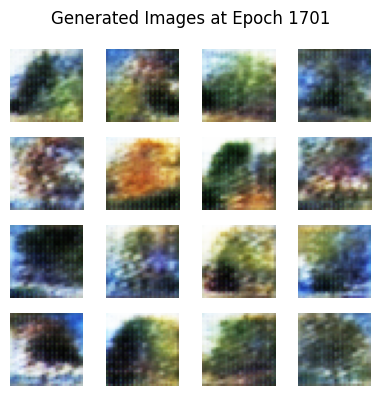

Time for epoch 1701 is 1.049903154373169 sec
Time for epoch 1711 is 0.8115928173065186 sec
Time for epoch 1721 is 0.8096203804016113 sec
Time for epoch 1731 is 0.8101928234100342 sec
Time for epoch 1741 is 0.8105509281158447 sec
Time for epoch 1751 is 0.8101732730865479 sec
Time for epoch 1761 is 0.8095741271972656 sec
Time for epoch 1771 is 0.8069820404052734 sec
Time for epoch 1781 is 0.8088798522949219 sec
Time for epoch 1791 is 0.8098292350769043 sec


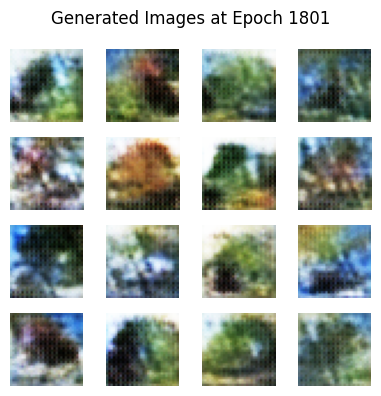

Time for epoch 1801 is 1.049630880355835 sec
Time for epoch 1811 is 0.809647798538208 sec
Time for epoch 1821 is 0.8119819164276123 sec
Time for epoch 1831 is 0.8095169067382812 sec
Time for epoch 1841 is 0.8102378845214844 sec
Time for epoch 1851 is 0.8098304271697998 sec
Time for epoch 1861 is 0.8095972537994385 sec
Time for epoch 1871 is 0.8097574710845947 sec
Time for epoch 1881 is 0.8083641529083252 sec
Time for epoch 1891 is 0.8087124824523926 sec


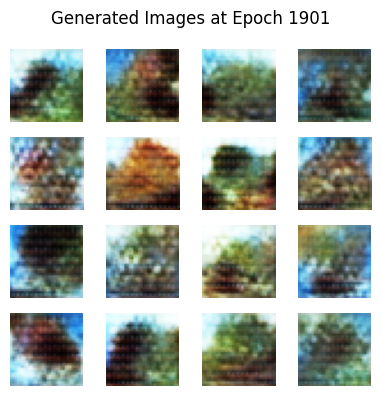

Time for epoch 1901 is 1.0737113952636719 sec
Time for epoch 1911 is 0.8106389045715332 sec
Time for epoch 1921 is 0.8090310096740723 sec
Time for epoch 1931 is 0.8109726905822754 sec
Time for epoch 1941 is 0.8096103668212891 sec
Time for epoch 1951 is 0.8087253570556641 sec
Time for epoch 1961 is 0.8121843338012695 sec
Time for epoch 1971 is 0.8106362819671631 sec
Time for epoch 1981 is 0.8107559680938721 sec
Time for epoch 1991 is 0.8116586208343506 sec


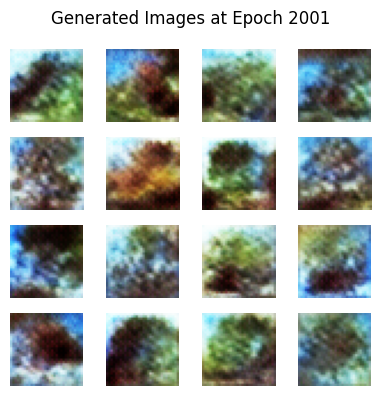

Time for epoch 2001 is 1.0555570125579834 sec
Time for epoch 2011 is 0.812673807144165 sec
Time for epoch 2021 is 0.8123507499694824 sec
Time for epoch 2031 is 0.8100299835205078 sec
Time for epoch 2041 is 0.810100793838501 sec
Time for epoch 2051 is 0.8096582889556885 sec
Time for epoch 2061 is 0.8111100196838379 sec
Time for epoch 2071 is 0.8102943897247314 sec
Time for epoch 2081 is 0.8095393180847168 sec
Time for epoch 2091 is 0.8086457252502441 sec


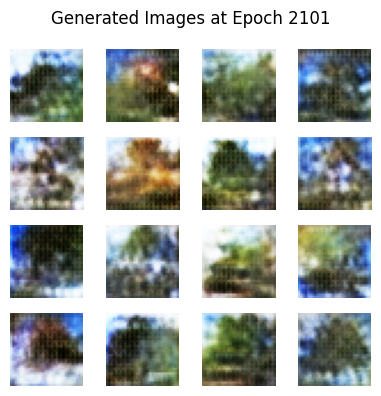

Time for epoch 2101 is 1.4139842987060547 sec
Time for epoch 2111 is 0.8055241107940674 sec
Time for epoch 2121 is 0.808739423751831 sec
Time for epoch 2131 is 0.8092126846313477 sec
Time for epoch 2141 is 0.8097240924835205 sec
Time for epoch 2151 is 0.8110718727111816 sec
Time for epoch 2161 is 0.8102445602416992 sec
Time for epoch 2171 is 0.8110401630401611 sec
Time for epoch 2181 is 0.8092231750488281 sec
Time for epoch 2191 is 0.8098723888397217 sec


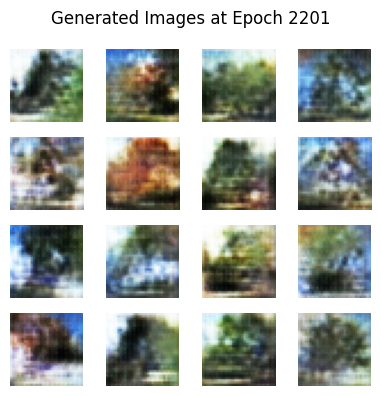

Time for epoch 2201 is 1.0677871704101562 sec
Time for epoch 2211 is 0.8082234859466553 sec
Time for epoch 2221 is 0.8094310760498047 sec
Time for epoch 2231 is 0.8058795928955078 sec
Time for epoch 2241 is 0.8127822875976562 sec
Time for epoch 2251 is 0.8110148906707764 sec
Time for epoch 2261 is 0.8092765808105469 sec
Time for epoch 2271 is 0.8078370094299316 sec
Time for epoch 2281 is 0.8083157539367676 sec
Time for epoch 2291 is 0.8101327419281006 sec


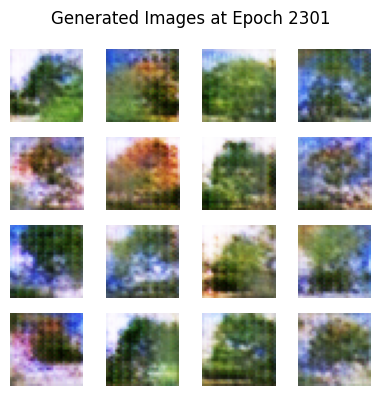

Time for epoch 2301 is 1.176687240600586 sec
Time for epoch 2311 is 0.8094689846038818 sec
Time for epoch 2321 is 0.8093748092651367 sec
Time for epoch 2331 is 0.8112044334411621 sec
Time for epoch 2341 is 0.8093352317810059 sec
Time for epoch 2351 is 0.809596061706543 sec
Time for epoch 2361 is 0.8087973594665527 sec
Time for epoch 2371 is 0.8112132549285889 sec
Time for epoch 2381 is 0.8086106777191162 sec
Time for epoch 2391 is 0.8056693077087402 sec


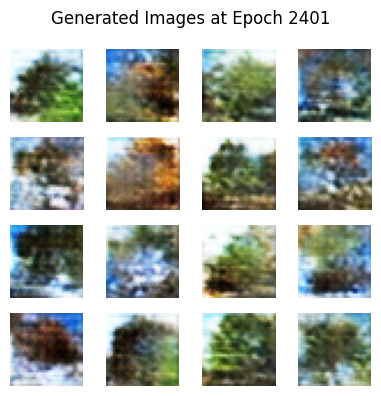

Time for epoch 2401 is 1.0553336143493652 sec
Time for epoch 2411 is 0.8115320205688477 sec
Time for epoch 2421 is 0.8063187599182129 sec
Time for epoch 2431 is 0.8091869354248047 sec
Time for epoch 2441 is 0.8110678195953369 sec
Time for epoch 2451 is 0.8094737529754639 sec
Time for epoch 2461 is 0.8104939460754395 sec
Time for epoch 2471 is 0.8114969730377197 sec
Time for epoch 2481 is 0.8095152378082275 sec
Time for epoch 2491 is 0.8090965747833252 sec


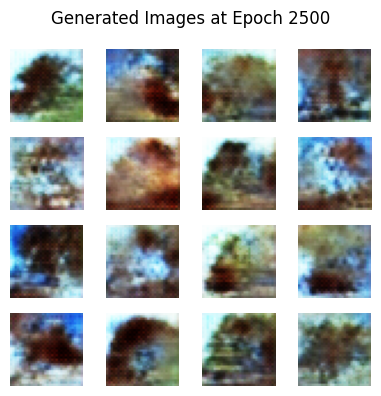

In [ ]:
train(train_dataset, EPOCHS)